In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
sys.path.insert(0, "../../scripts")
from utils import load_data, infer_L1000_features
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA

from tensorflow import keras


from vae import VAE
from tensorflow.keras.models import Model, Sequential
import seaborn
import tensorflow as tf


In [2]:
data_splits = ["train", "test", "valid", "complete"]
data_dict = load_data(data_splits, dataset="L1000")

/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
# Prepare data for training

meta_features = infer_L1000_features(data_dict["train"], metadata=True)
profile_features = infer_L1000_features(data_dict["train"])

train_features_df = data_dict["train"].reindex(profile_features, axis="columns")
train_meta_df = data_dict["train"].reindex(meta_features, axis="columns")

valid_features_df = data_dict["valid"].reindex(profile_features, axis="columns")
valid_meta_df = data_dict["valid"].reindex(meta_features, axis="columns")

test_features_df = data_dict["test"].reindex(profile_features, axis="columns")
test_meta_df = data_dict["test"].reindex(meta_features, axis="columns")

complete_features_df = data_dict["complete"].reindex(profile_features, axis="columns")
complete_meta_df = data_dict["complete"].reindex(meta_features, axis="columns")

In [4]:
print(train_features_df.shape)
train_features_df.head(3)

(94440, 978)


,780,7849,6193,23,9552,387,10921,10285,533,6194,...,54681,11000,6915,6253,7264,5467,2767,23038,57048,79716
0,0.74578,-0.007757,-0.063908,-0.115210,0.83776,-0.80023,-0.25787,-0.621180,-0.53313,-0.260430,...,-0.458550,0.51684,2.86550,-0.152210,-0.907810,1.47600,-0.42918,-0.81612,0.28533,0.37183
1,-0.29710,-0.180930,0.482090,-0.337130,-0.47045,-0.44483,0.38475,-0.566390,0.27726,0.000645,...,0.008161,-0.33238,-0.20174,-0.605390,0.024792,0.60759,0.41555,0.50640,0.23908,-0.23696
2,-0.75812,-0.283820,0.594330,0.089136,-0.85230,-0.78754,0.20291,0.018564,-0.22745,-0.839810,...,0.289560,0.16598,0.54440,-0.053607,0.439350,0.42920,-0.37040,-0.51931,-0.21799,-1.29360


In [5]:
def shuffle_each_column(df):
    columns = df.columns
    df_copy = df.copy()
    for column in columns:
        df_copy[column] = df_copy[column].sample(frac=1).reset_index(drop=True)
    return (df_copy)

In [6]:
train_features_df = shuffle_each_column(train_features_df)
valid_features_df = shuffle_each_column(valid_features_df)

In [7]:
encoder_architecture = [500]
decoder_architecture = [500]

In [8]:
L1000_vae = VAE(
    input_dim=train_features_df.shape[1],
    latent_dim=65,
    batch_size=512,
    encoder_batch_norm=True,
    epochs=180,
    learning_rate=0.001,
    encoder_architecture=encoder_architecture,
    decoder_architecture=decoder_architecture,
    beta=40,
    verbose=True,
)

L1000_vae.compile_vae()

In [9]:
L1000_vae.train(x_train=train_features_df, x_test=valid_features_df)

Epoch 1/180
185/185 [==============================] - 6s 27ms/step - loss: 3204.8121 - recon: 2058.2246 - kl: 870.2112 - val_loss: 3113.6074 - val_recon: 2056.6230 - val_kl: 1056.9849
Epoch 2/180
185/185 [==============================] - 4s 22ms/step - loss: 2331.4836 - recon: 2047.5312 - kl: 222.4595 - val_loss: 2232.4309 - val_recon: 2057.3894 - val_kl: 175.0417
Epoch 3/180
185/185 [==============================] - 4s 22ms/step - loss: 2182.0952 - recon: 2047.6755 - kl: 125.5223 - val_loss: 2172.0986 - val_recon: 2057.1318 - val_kl: 114.9669
Epoch 4/180
185/185 [==============================] - 4s 23ms/step - loss: 2151.6219 - recon: 2047.5929 - kl: 100.3155 - val_loss: 2150.3662 - val_recon: 2057.2935 - val_kl: 93.0729
Epoch 5/180
185/185 [==============================] - 4s 22ms/step - loss: 2136.2080 - recon: 2047.5693 - kl: 84.3363 - val_loss: 2136.3113 - val_recon: 2057.1455 - val_kl: 79.1655
Epoch 6/180
185/185 [==============================] - 4s 22ms/step - loss: 2121.6

185/185 [==============================] - 4s 22ms/step - loss: 2054.6636 - recon: 2054.3123 - kl: 7.9935e-04 - val_loss: 2064.0613 - val_recon: 2064.0605 - val_kl: 9.2565e-04
Epoch 47/180
185/185 [==============================] - 4s 23ms/step - loss: 2053.8387 - recon: 2054.3113 - kl: 8.4793e-04 - val_loss: 2063.9792 - val_recon: 2063.9780 - val_kl: 8.0031e-04
Epoch 48/180
185/185 [==============================] - 4s 22ms/step - loss: 2053.9368 - recon: 2054.3105 - kl: 8.9664e-04 - val_loss: 2063.9924 - val_recon: 2063.9912 - val_kl: 9.7210e-04
Epoch 49/180
185/185 [==============================] - 4s 22ms/step - loss: 2055.2724 - recon: 2054.3142 - kl: 9.1846e-04 - val_loss: 2063.9692 - val_recon: 2063.9683 - val_kl: 6.9548e-04
Epoch 50/180
185/185 [==============================] - 4s 23ms/step - loss: 2054.8146 - recon: 2054.3047 - kl: 7.8913e-04 - val_loss: 2063.9849 - val_recon: 2063.9844 - val_kl: 6.6401e-04
Epoch 51/180
185/185 [==============================] - 4s 23ms/step

185/185 [==============================] - 4s 23ms/step - loss: 2054.3599 - recon: 2054.2554 - kl: 0.0081 - val_loss: 2063.9790 - val_recon: 2063.9714 - val_kl: 0.0077
Epoch 91/180
185/185 [==============================] - 4s 23ms/step - loss: 2054.3315 - recon: 2054.2539 - kl: 0.0080 - val_loss: 2063.9612 - val_recon: 2063.9500 - val_kl: 0.0113
Epoch 92/180
185/185 [==============================] - 4s 24ms/step - loss: 2054.0396 - recon: 2054.2644 - kl: 0.0081 - val_loss: 2063.9434 - val_recon: 2063.9351 - val_kl: 0.0087
Epoch 93/180
185/185 [==============================] - 4s 24ms/step - loss: 2053.1951 - recon: 2054.2483 - kl: 0.0077 - val_loss: 2063.9663 - val_recon: 2063.9580 - val_kl: 0.0085
Epoch 94/180
185/185 [==============================] - 4s 23ms/step - loss: 2053.6775 - recon: 2054.2671 - kl: 0.0075 - val_loss: 2063.9644 - val_recon: 2063.9565 - val_kl: 0.0081
Epoch 95/180
185/185 [==============================] - 4s 23ms/step - loss: 2054.7317 - recon: 2054.2512 - 

185/185 [==============================] - 4s 23ms/step - loss: 2054.6877 - recon: 2054.2334 - kl: 0.0048 - val_loss: 2063.9155 - val_recon: 2063.8860 - val_kl: 0.0298
Epoch 136/180
185/185 [==============================] - 4s 23ms/step - loss: 2052.8302 - recon: 2054.2246 - kl: 0.0046 - val_loss: 2063.9224 - val_recon: 2063.9124 - val_kl: 0.0103
Epoch 137/180
185/185 [==============================] - 4s 23ms/step - loss: 2053.0330 - recon: 2054.2339 - kl: 0.0041 - val_loss: 2063.9487 - val_recon: 2063.9204 - val_kl: 0.0283
Epoch 138/180
185/185 [==============================] - 4s 23ms/step - loss: 2054.9735 - recon: 2054.2183 - kl: 0.0043 - val_loss: 2063.9424 - val_recon: 2063.9316 - val_kl: 0.0103
Epoch 139/180
185/185 [==============================] - 4s 23ms/step - loss: 2054.6798 - recon: 2054.2305 - kl: 0.0037 - val_loss: 2063.9070 - val_recon: 2063.9033 - val_kl: 0.0038
Epoch 140/180
185/185 [==============================] - 4s 23ms/step - loss: 2053.7952 - recon: 2054.23

185/185 [==============================] - 5s 25ms/step - loss: 2054.7160 - recon: 2054.2239 - kl: 0.0030 - val_loss: 2063.9050 - val_recon: 2063.9023 - val_kl: 0.0029


In [10]:
L1000_vae.vae

In [11]:
# Save training performance
history_df = pd.DataFrame(L1000_vae.vae.history.history)
history_df

,loss,recon,kl,val_loss,val_recon,val_kl
0,2928.436035,2058.224609,870.211182,3113.607422,2056.623047,1056.984863
1,2269.991943,2047.531250,222.459473,2232.430908,2057.389404,175.041748
2,2173.196777,2047.675537,125.522278,2172.098633,2057.131836,114.966911
3,2147.908447,2047.592896,100.315498,2150.366211,2057.293457,93.072945
4,2131.905762,2047.569336,84.336258,2136.311279,2057.145508,79.165497
...,...,...,...,...,...,...
175,2054.229004,2054.226562,0.002692,2063.921143,2063.917236,0.003545
176,2054.217773,2054.214355,0.002830,2063.894531,2063.891846,0.002681
177,2054.226074,2054.223633,0.002308,2063.870117,2063.867432,0.002700
178,2054.229004,2054.226318,0.002546,2063.898438,2063.895020,0.002919


In [12]:
history_df.to_csv('L1000_training_random.csv')

In [14]:
original_training_data  = pd.read_csv('twolayer_training.csv')

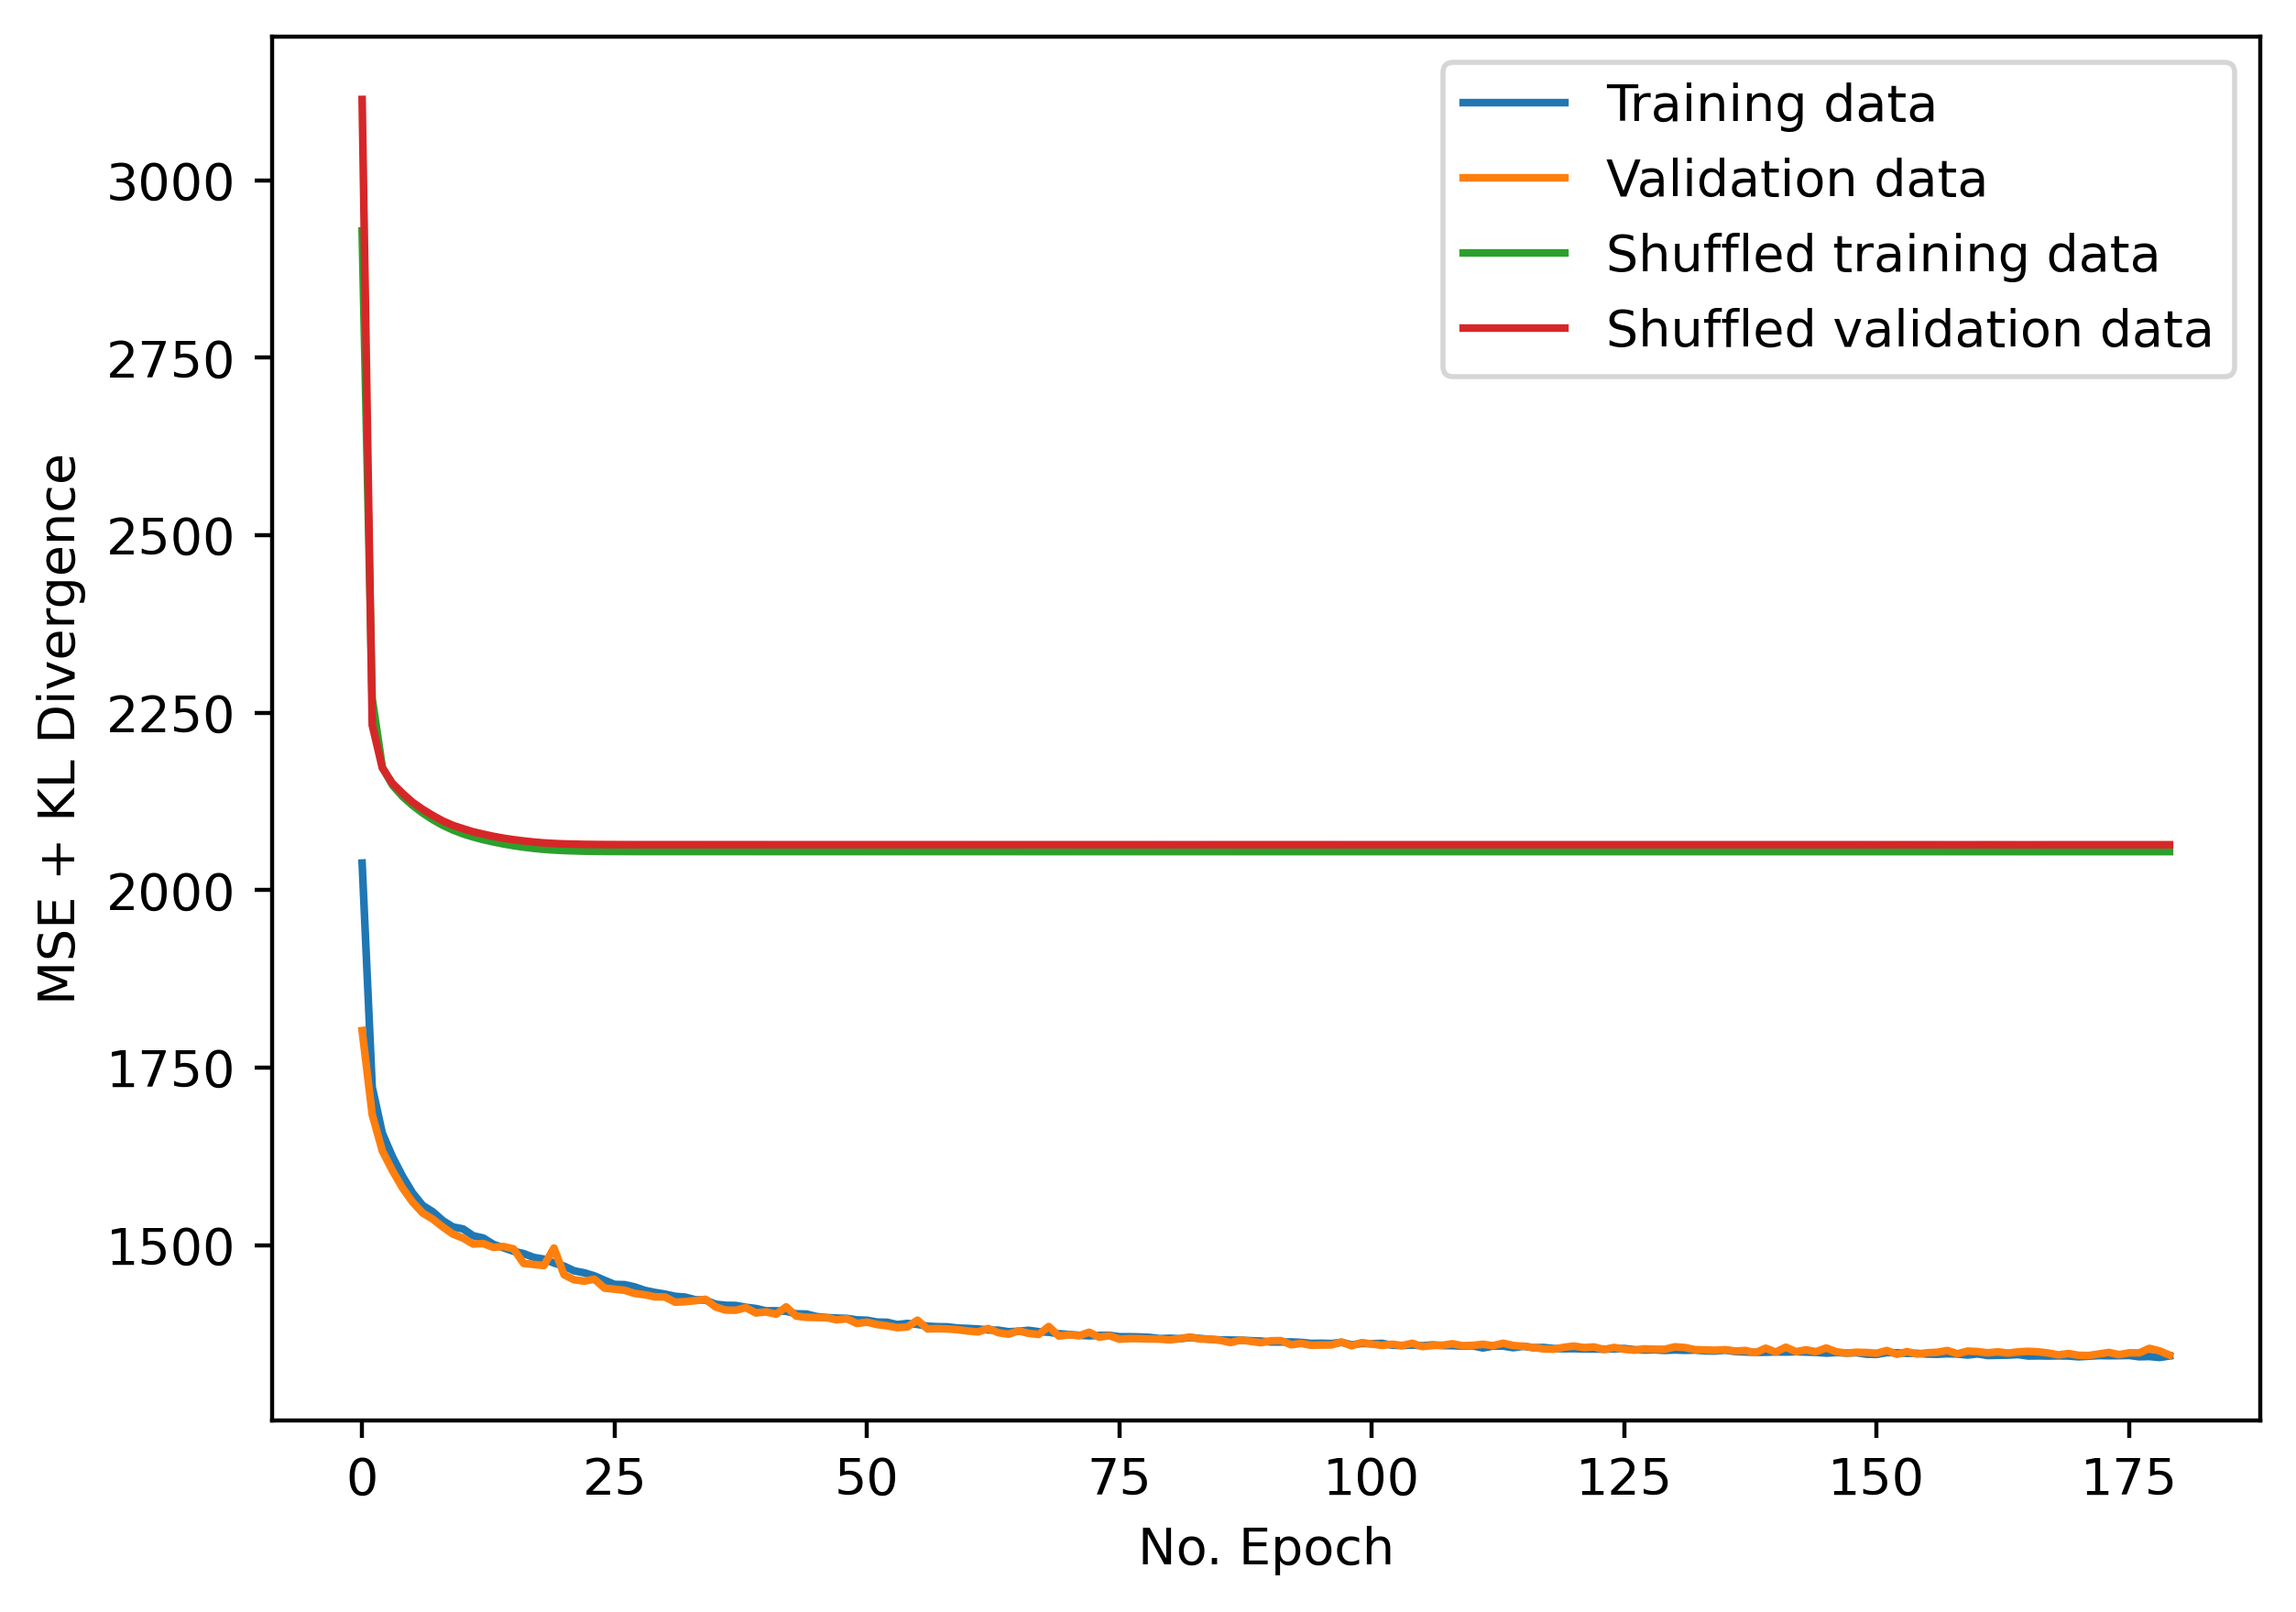

In [15]:
plt.figure(figsize=(7, 5), dpi = 400)
plt.plot(original_training_data["loss"], label="Training data")
plt.plot(original_training_data["val_loss"], label="Validation data")
plt.plot(history_df["loss"], label="Shuffled training data")
plt.plot(history_df["val_loss"], label="Shuffled validation data")
# plt.title("Loss for VAE training on Cell Painting Level 5 data")
plt.ylabel("MSE + KL Divergence")
plt.xlabel("No. Epoch")
plt.legend()
plt.show()

In [16]:
L1000_vae = VAE(
    input_dim=train_features_df.shape[1],
    latent_dim=65,
    batch_size=512,
    encoder_batch_norm=True,
    epochs=180,
    learning_rate=0.001,
    encoder_architecture=encoder_architecture,
    decoder_architecture=decoder_architecture,
    beta=1,
    verbose=True,
)

L1000_vae.compile_vae()

In [18]:
L1000_vae.train(x_train=train_features_df, x_test=valid_features_df)

Epoch 1/180
185/185 [==============================] - 6s 26ms/step - loss: 2107.8225 - recon: 2037.6458 - kl: 28.9920 - val_loss: 2055.1379 - val_recon: 2012.0826 - val_kl: 43.0553
Epoch 2/180
185/185 [==============================] - 4s 24ms/step - loss: 2016.8217 - recon: 1976.3168 - kl: 30.0085 - val_loss: 1985.7773 - val_recon: 1944.5355 - val_kl: 41.2416
Epoch 3/180
185/185 [==============================] - 4s 24ms/step - loss: 1972.0995 - recon: 1928.4166 - kl: 38.6081 - val_loss: 1963.5867 - val_recon: 1915.2981 - val_kl: 48.2887
Epoch 4/180
185/185 [==============================] - 4s 24ms/step - loss: 1951.9575 - recon: 1901.1742 - kl: 46.5897 - val_loss: 1951.5981 - val_recon: 1899.1820 - val_kl: 52.4162
Epoch 5/180
185/185 [==============================] - 4s 24ms/step - loss: 1935.8470 - recon: 1885.4897 - kl: 50.3586 - val_loss: 1942.5354 - val_recon: 1888.9255 - val_kl: 53.6097
Epoch 6/180
185/185 [==============================] - 4s 24ms/step - loss: 1927.8947 - re

Epoch 46/180
185/185 [==============================] - 4s 23ms/step - loss: 1793.9700 - recon: 1728.4744 - kl: 67.1679 - val_loss: 1811.9888 - val_recon: 1744.9701 - val_kl: 67.0189
Epoch 47/180
185/185 [==============================] - 4s 23ms/step - loss: 1793.3746 - recon: 1726.4338 - kl: 67.8020 - val_loss: 1810.9683 - val_recon: 1743.1847 - val_kl: 67.7831
Epoch 48/180
185/185 [==============================] - 4s 23ms/step - loss: 1791.6618 - recon: 1724.5511 - kl: 68.4185 - val_loss: 1809.7170 - val_recon: 1741.3989 - val_kl: 68.3183
Epoch 49/180
185/185 [==============================] - 4s 23ms/step - loss: 1790.7877 - recon: 1722.6438 - kl: 69.0453 - val_loss: 1808.8394 - val_recon: 1739.9448 - val_kl: 68.8948
Epoch 50/180
185/185 [==============================] - 4s 23ms/step - loss: 1790.3679 - recon: 1720.8199 - kl: 69.6502 - val_loss: 1807.7694 - val_recon: 1738.2534 - val_kl: 69.5155
Epoch 51/180
185/185 [==============================] - 4s 23ms/step - loss: 1787.655

Epoch 91/180
185/185 [==============================] - 4s 24ms/step - loss: 1762.8259 - recon: 1682.2219 - kl: 81.5197 - val_loss: 1788.9125 - val_recon: 1707.9951 - val_kl: 80.9173
Epoch 92/180
185/185 [==============================] - 4s 24ms/step - loss: 1762.6047 - recon: 1681.7181 - kl: 81.6246 - val_loss: 1788.1715 - val_recon: 1707.1116 - val_kl: 81.0601
Epoch 93/180
185/185 [==============================] - 4s 24ms/step - loss: 1762.3485 - recon: 1681.2266 - kl: 81.7555 - val_loss: 1788.2231 - val_recon: 1707.1365 - val_kl: 81.0868
Epoch 94/180
185/185 [==============================] - 4s 24ms/step - loss: 1763.2375 - recon: 1680.6622 - kl: 81.8575 - val_loss: 1787.9849 - val_recon: 1706.9016 - val_kl: 81.0833
Epoch 95/180
185/185 [==============================] - 4s 24ms/step - loss: 1760.3583 - recon: 1680.2711 - kl: 81.9199 - val_loss: 1787.6222 - val_recon: 1706.3646 - val_kl: 81.2572
Epoch 96/180
185/185 [==============================] - 4s 24ms/step - loss: 1761.277

185/185 [==============================] - 4s 23ms/step - loss: 1749.6628 - recon: 1666.2642 - kl: 84.8990 - val_loss: 1780.5376 - val_recon: 1696.2590 - val_kl: 84.2784
Epoch 136/180
185/185 [==============================] - 4s 23ms/step - loss: 1750.2022 - recon: 1665.8555 - kl: 84.9727 - val_loss: 1780.4961 - val_recon: 1696.5155 - val_kl: 83.9808
Epoch 137/180
185/185 [==============================] - 4s 23ms/step - loss: 1748.9421 - recon: 1665.4384 - kl: 85.0311 - val_loss: 1779.9524 - val_recon: 1695.4865 - val_kl: 84.4660
Epoch 138/180
185/185 [==============================] - 4s 23ms/step - loss: 1749.4028 - recon: 1665.4341 - kl: 85.0856 - val_loss: 1779.9149 - val_recon: 1695.7476 - val_kl: 84.1673
Epoch 139/180
185/185 [==============================] - 4s 23ms/step - loss: 1748.9653 - recon: 1665.0394 - kl: 85.1485 - val_loss: 1779.7828 - val_recon: 1695.5164 - val_kl: 84.2665
Epoch 140/180
185/185 [==============================] - 4s 23ms/step - loss: 1748.2144 - reco

185/185 [==============================] - 4s 24ms/step - loss: 1742.8877 - recon: 1655.5190 - kl: 87.1465 - val_loss: 1774.8217 - val_recon: 1688.6578 - val_kl: 86.1640
Epoch 180/180
185/185 [==============================] - 4s 24ms/step - loss: 1741.2813 - recon: 1655.4535 - kl: 87.2023 - val_loss: 1774.8569 - val_recon: 1688.4293 - val_kl: 86.4276


In [20]:
L1000_vae.vae

In [22]:
# Save training performance
history_df = pd.DataFrame(L1000_vae.vae.history.history)
history_df

,loss,recon,kl,val_loss,val_recon,val_kl
0,2066.637207,2037.645752,28.992041,2055.137939,2012.082642,43.055264
1,2006.326172,1976.316772,30.008547,1985.777344,1944.535522,41.241558
2,1967.024780,1928.416626,38.608078,1963.586670,1915.298096,48.288685
3,1947.763550,1901.174194,46.589748,1951.598145,1899.182007,52.416225
4,1935.848389,1885.489746,50.358635,1942.535400,1888.925537,53.609715
...,...,...,...,...,...,...
175,1743.216309,1656.145996,87.069916,1775.285400,1689.089233,86.196297
176,1743.088501,1656.013428,87.075462,1774.965820,1688.804688,86.160934
177,1742.880615,1655.755493,87.125198,1775.132202,1688.901001,86.230980
178,1742.666382,1655.519043,87.146461,1774.821655,1688.657837,86.164047


In [23]:
history_df.to_csv('L1000_training_vanilla_random.csv')

In [24]:
original_training_data  = pd.read_csv('twolayer_training_vanilla.csv')

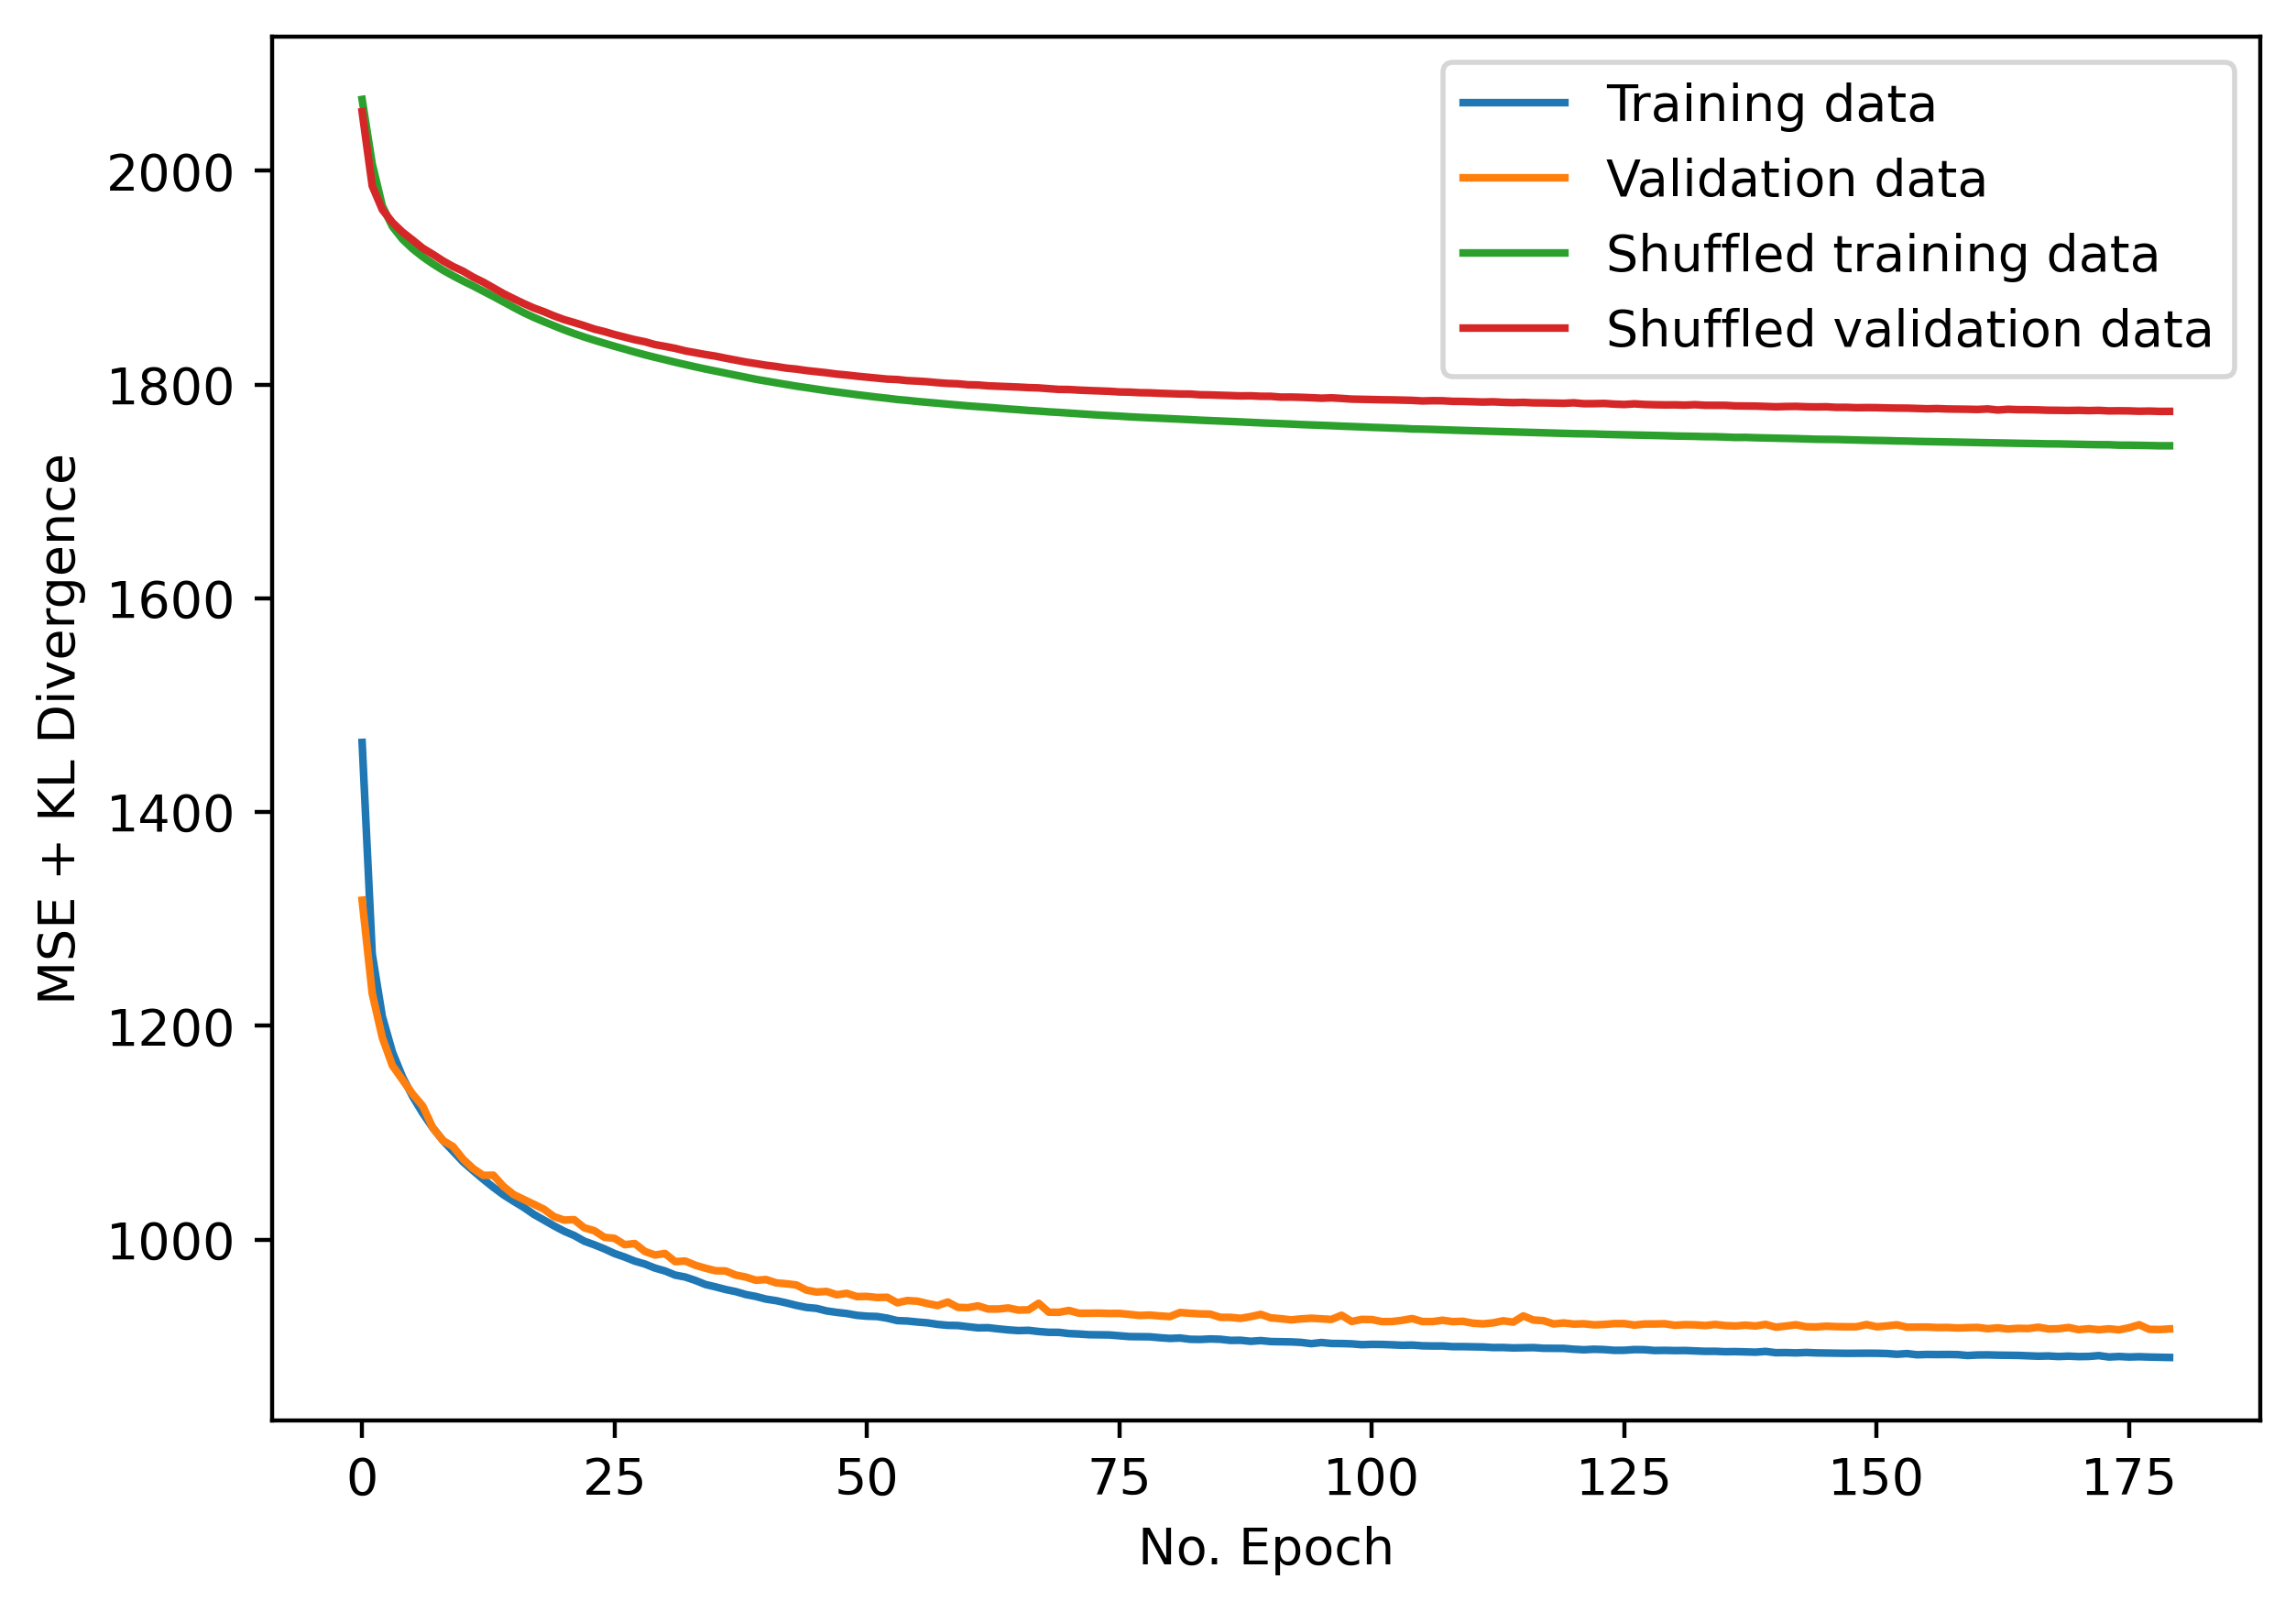

In [25]:
plt.figure(figsize=(7, 5), dpi = 400)
plt.plot(original_training_data["loss"], label="Training data")
plt.plot(original_training_data["val_loss"], label="Validation data")
plt.plot(history_df["loss"], label="Shuffled training data")
plt.plot(history_df["val_loss"], label="Shuffled validation data")
# plt.title("Loss for VAE training on Cell Painting Level 5 data")
plt.ylabel("MSE + KL Divergence")
plt.xlabel("No. Epoch")
plt.legend()
plt.show()

In [8]:
L1000_vae = VAE(
    input_dim=train_features_df.shape[1],
    latent_dim=65,
    batch_size=512,
    encoder_batch_norm=True,
    epochs=30,
    learning_rate=0.001,
    encoder_architecture=encoder_architecture,
    decoder_architecture=decoder_architecture,
    beta=0,
    lam=10000000,
    verbose=True,
)

L1000_vae.compile_vae()

In [9]:
L1000_vae.train(x_train=train_features_df, x_test=valid_features_df)

Epoch 1/30
185/185 [==============================] - 29s 144ms/step - loss: 23818.7907 - recon: 2055.7312 - kl: 0.0000e+00 - mmd: 16571.6953 - val_loss: 8062.6880 - val_recon: 2050.6602 - val_kl: 0.0000e+00 - val_mmd: 6745.8052
Epoch 2/30
185/185 [==============================] - 26s 138ms/step - loss: 8425.4336 - recon: 2040.5381 - kl: 0.0000e+00 - mmd: 4960.4722 - val_loss: 4026.7593 - val_recon: 2050.8032 - val_kl: 0.0000e+00 - val_mmd: 2987.8320
Epoch 3/30
185/185 [==============================] - 25s 138ms/step - loss: 4404.5400 - recon: 2040.6337 - kl: 0.0000e+00 - mmd: 2084.4800 - val_loss: 3626.2739 - val_recon: 2050.4949 - val_kl: 0.0000e+00 - val_mmd: 2347.1814
Epoch 4/30
185/185 [==============================] - 25s 138ms/step - loss: 3574.9021 - recon: 2040.4576 - kl: 0.0000e+00 - mmd: 1457.6846 - val_loss: 3552.9033 - val_recon: 2049.7864 - val_kl: 0.0000e+00 - val_mmd: 2499.2229
Epoch 5/30
185/185 [==============================] - 25s 138ms/step - loss: 3331.2380 - r

In [10]:
L1000_vae.vae

In [11]:
# Save training performance
history_df = pd.DataFrame(L1000_vae.vae.history.history)
history_df

,loss,recon,kl,mmd,val_loss,val_recon,val_kl,val_mmd
0,18623.332031,2055.731201,0.0,16571.695312,8062.687988,2050.660156,0.0,6745.805176
1,7028.411133,2040.538086,0.0,4960.472168,4026.759277,2050.803223,0.0,2987.832031
2,4092.050049,2040.633667,0.0,2084.479980,3626.273926,2050.494873,0.0,2347.181396
3,3506.265137,2040.457642,0.0,1457.684570,3552.903320,2049.786377,0.0,2499.222900
4,3330.157715,2039.996094,0.0,1314.788574,3535.080078,2049.095703,0.0,2108.067139
5,3281.180176,2039.177124,0.0,1207.989380,3506.732178,2048.258057,0.0,2327.462158
6,3210.435303,2038.426880,0.0,1193.433472,3335.883789,2047.044312,0.0,2213.021240
7,3201.251221,2037.702148,0.0,1178.271362,3400.672852,2046.308716,0.0,2221.117188
8,3185.552490,2036.861206,0.0,1187.775513,3448.557129,2045.543457,0.0,2047.071899
9,3175.064697,2036.046875,0.0,1136.927734,3365.027100,2045.302368,0.0,2015.183228


In [12]:
history_df.to_csv('L1000_training_mmd_random.csv')

In [14]:
original_training_data  = pd.read_csv('twolayer_training_mmd.csv')

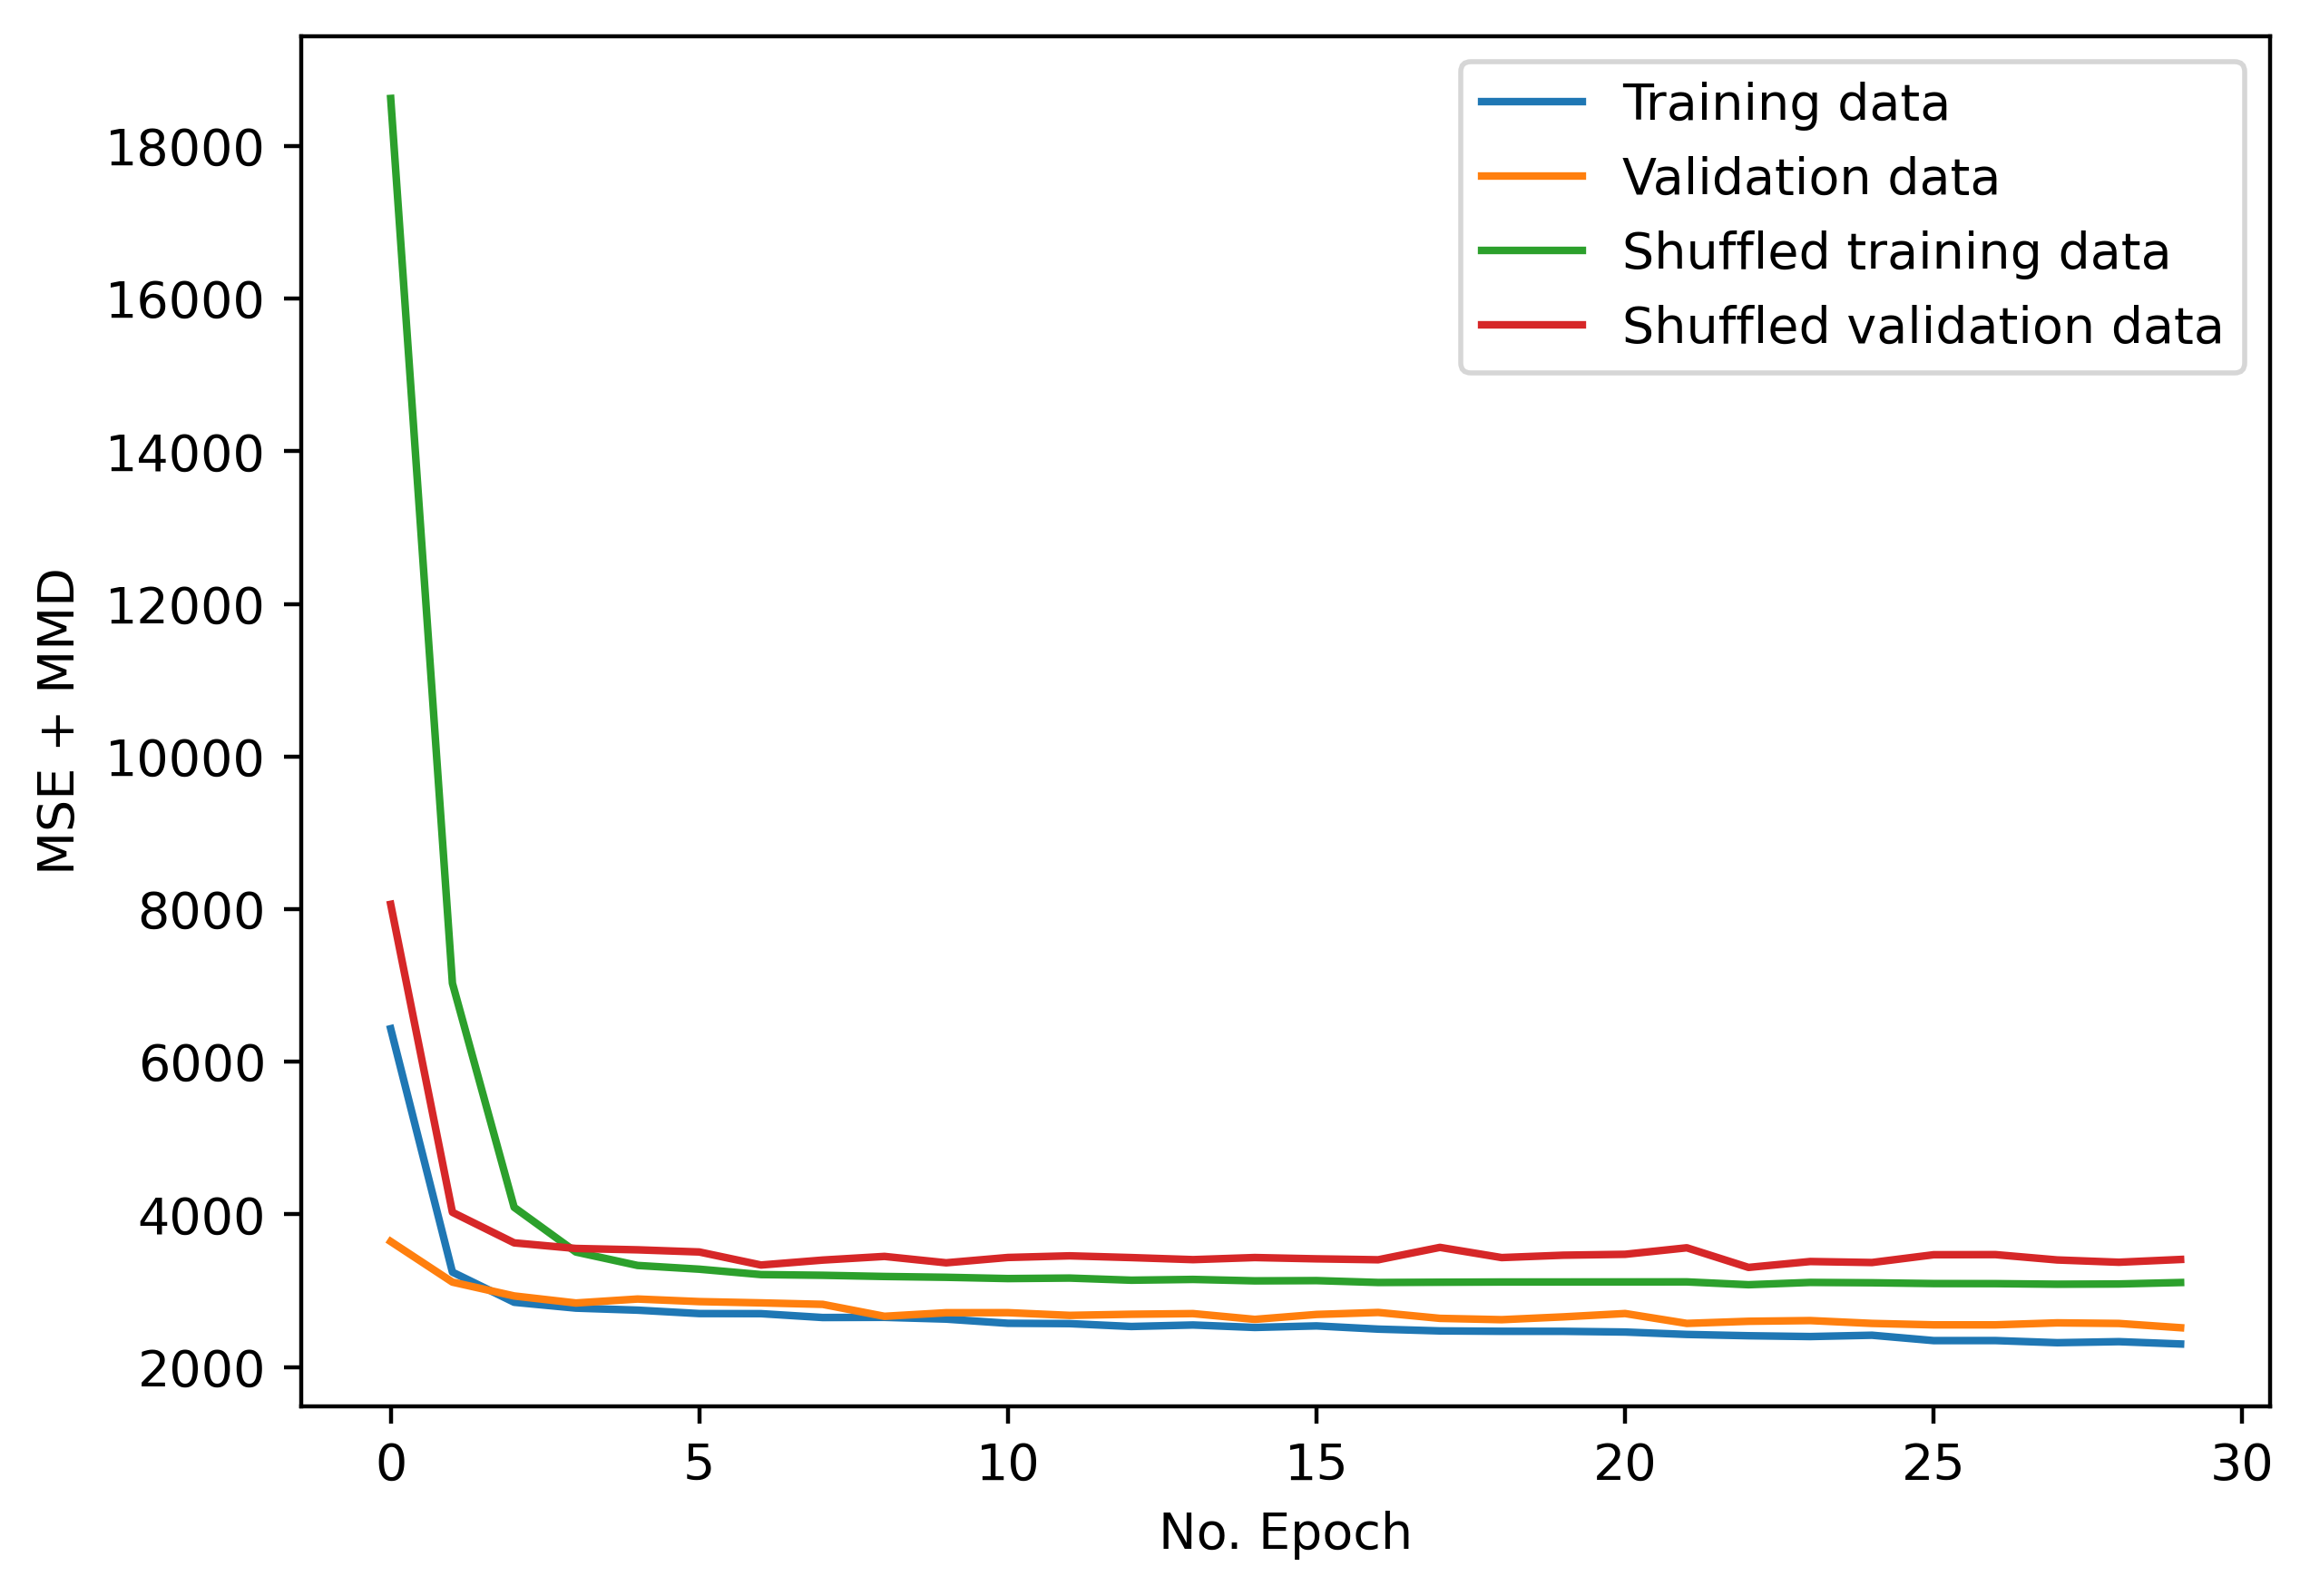

In [15]:
plt.figure(figsize=(7, 5), dpi = 400)
plt.plot(original_training_data["loss"], label="Training data")
plt.plot(original_training_data["val_loss"], label="Validation data")
plt.plot(history_df["loss"], label="Shuffled training data")
plt.plot(history_df["val_loss"], label="Shuffled validation data")
# plt.title("Loss for VAE training on Cell Painting Level 5 data")
plt.ylabel("MSE + MMD")
plt.xlabel("No. Epoch")
plt.legend()
plt.show()